In [1]:
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

In [2]:
# %matplotlib inline
# from matplotlib import style

# style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from pylab import rcParams

rcParams["figure.figsize"] = 15, 10
rcParams.update({"font.size": 14})

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import Column, Integer, String, Float, Date
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

<IPython.core.display.Javascript object>

# Reflect Tables into SQLAlchemy ORM

In [4]:
# reflect an existing database into a new model
Base = automap_base()

<IPython.core.display.Javascript object>

In [5]:
class DictMixIn:
    def to_dict(self):
        return {
            column.name: getattr(self, column.name)
            if not isinstance(getattr(self, column.name), dt.datetime)
            else getattr(self, column.name).isoformat()
            for column in self.__table__.columns
        }


class Measurement(Base, DictMixIn):
    __table_args__ = {"extend_existing": True}
    __tablename__ = "measurement"
    station = Column("station", String)
    date = Column("date", Date)
    prcp = Column("prcp", Float)
    tobs = Column("tobs", Integer)


class Station(Base, DictMixIn):
    __table_args__ = {"extend_existing": True}
    __tablename__ = "station"
    station = Column("station", String)
    name = Column("name", String)
    latitude = Column("latitude", Float)
    longitude = Column("longitude", Float)
    elevation = Column("elevation", Float)

<IPython.core.display.Javascript object>

In [6]:
# Save references to each table
# Measurement = Base.classes.measurement
# Station = Base.classes.station

<IPython.core.display.Javascript object>

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect the tables
Base.prepare(engine, reflect=True)
# Create our session (link) from Python to the DB
session = Session(engine)
# We can view all of the classes that automap found
# Base.classes.keys()

<IPython.core.display.Javascript object>

# Exploratory Climate Analysis

## Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

In [8]:
date_last = session.query(Measurement).order_by(Measurement.id.desc()).first().date
date_one_yr_ago = date_last - dt.timedelta(days=365)
date_one_yr_ago

datetime.date(2016, 8, 23)

<IPython.core.display.Javascript object>

* Perform a query to retrieve the data and precipitation scores

In [9]:
last_yr_measurements = (
    session.query(Measurement).filter(Measurement.date >= date_one_yr_ago).all()
)
last_yr_measurements = [measurement.to_dict() for measurement in last_yr_measurements]

<IPython.core.display.Javascript object>

* Save the query results as a Pandas DataFrame and set the index to the date column

In [10]:
last_yr_measurements = pd.DataFrame(last_yr_measurements)
last_yr_measurements.set_index("date", inplace=True)
last_yr_measurements

,station,prcp,tobs,id
date,,,,
2016-08-23,USC00519397,0.00,81.0,2364
2016-08-24,USC00519397,0.08,79.0,2365
2016-08-25,USC00519397,0.08,80.0,2366
2016-08-26,USC00519397,0.00,79.0,2367
2016-08-27,USC00519397,0.00,77.0,2368
...,...,...,...,...
2017-08-19,USC00516128,0.09,71.0,19546
2017-08-20,USC00516128,NaN,78.0,19547
2017-08-21,USC00516128,0.56,76.0,19548


<IPython.core.display.Javascript object>

* Sort the dataframe by date

In [11]:
last_yr_measurements.sort_values(by=["date", "station"], ascending=True, inplace=True)
last_yr_measurements

,station,prcp,tobs,id
date,,,,
2016-08-23,USC00513117,0.15,76.0,5091
2016-08-23,USC00514830,0.05,80.0,7331
2016-08-23,USC00516128,0.70,74.0,19202
2016-08-23,USC00517948,NaN,80.0,8825
2016-08-23,USC00519281,1.79,77.0,14608
...,...,...,...,...
2017-08-22,USC00519523,0.00,82.0,12186
2017-08-23,USC00514830,0.00,82.0,7635
2017-08-23,USC00516128,0.45,76.0,19550


<IPython.core.display.Javascript object>

* Use Pandas Plotting with Matplotlib to plot the data

In [12]:
last_yr_measurements.pivot(columns="station")["prcp"]

station,USC00513117,USC00514830,USC00516128,USC00517948,USC00519281,USC00519397,USC00519523
date,,,,,,,
2016-08-23,0.15,0.05,0.70,NaN,1.79,0.00,0.02
2016-08-24,2.15,2.28,1.45,NaN,2.15,0.08,1.22
2016-08-25,0.08,0.00,0.11,0.00,0.06,0.08,0.21
2016-08-26,0.03,0.02,NaN,0.04,0.01,0.00,0.00
2016-08-27,0.18,0.02,NaN,NaN,0.12,0.00,0.00
...,...,...,...,...,...,...,...
2017-08-19,NaN,0.00,0.09,NaN,NaN,0.00,NaN
2017-08-20,NaN,0.01,NaN,NaN,NaN,0.00,NaN
2017-08-21,NaN,0.02,0.56,NaN,NaN,0.00,NaN


<IPython.core.display.Javascript object>

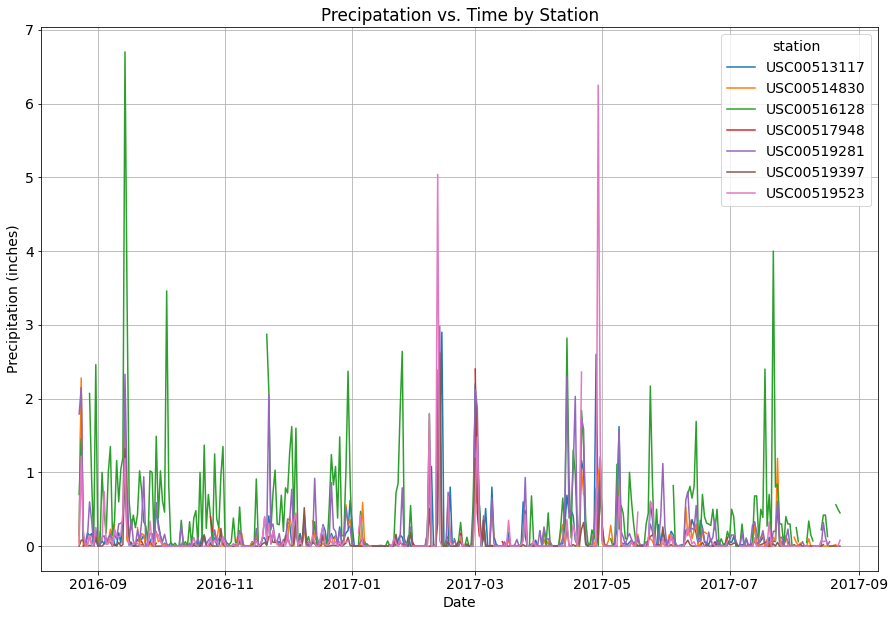

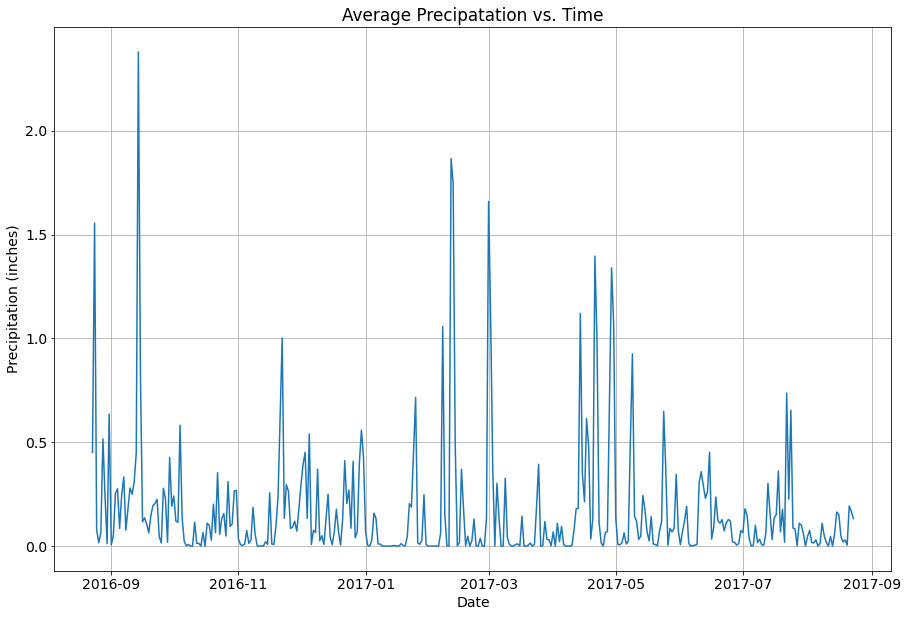

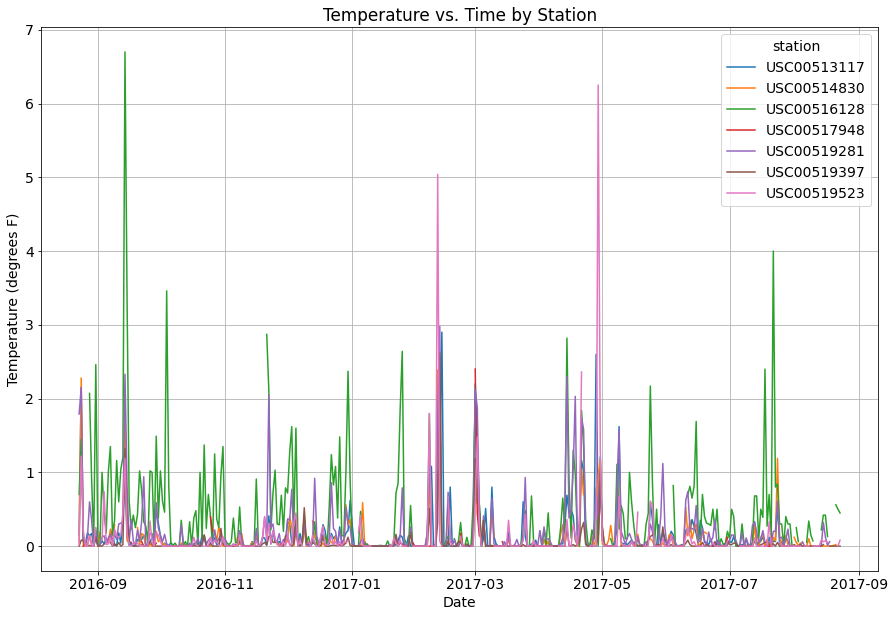

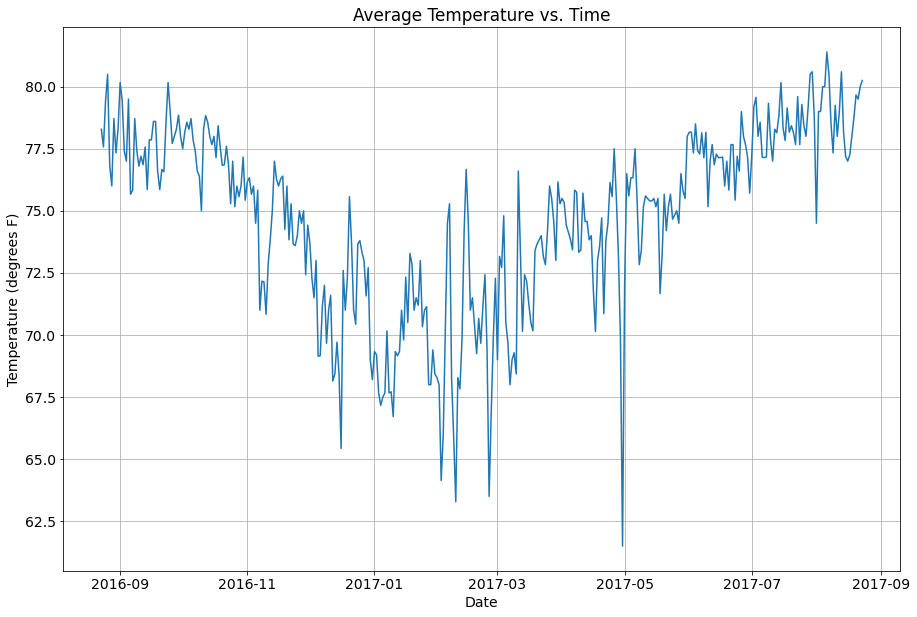

<IPython.core.display.Javascript object>

In [13]:
last_yr_measurements.pivot(columns="station")["prcp"].plot()
plt.title("Precipatation vs. Time by Station")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.grid()
plt.show()

last_yr_measurements.groupby(by="date").mean()["prcp"].plot()
plt.title("Average Precipatation vs. Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.grid()
plt.show()

last_yr_measurements.pivot(columns="station")["prcp"].plot()
plt.title("Temperature vs. Time by Station")
plt.xlabel("Date")
plt.ylabel("Temperature (degrees F)")
plt.grid()
plt.show()

last_yr_measurements.groupby(by="date").mean()["tobs"].plot()
plt.title("Average Temperature vs. Time")
plt.xlabel("Date")
plt.ylabel("Temperature (degrees F)")
plt.grid()
plt.show()

* Use Pandas to calculate the summary statistics for the precipitation data

In [14]:
pd.DataFrame(last_yr_measurements["prcp"].describe())

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<IPython.core.display.Javascript object>

# Station Analysis

* Design a query to show how many stations are available in this dataset?

In [15]:
session.query(Measurement.station).distinct().count()

9

<IPython.core.display.Javascript object>

* What are the most active stations? (i.e. what stations have the most rows)?
* List the stations and the counts in descending order.
* Note to graders: I'm pretty sure the solution used the wrong column for the counts

In [16]:
station_prcp_activity = (
    session.query(Measurement.station, func.count(Measurement.prcp))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.prcp).desc())
    .all()
)
station_prcp_activity

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

<IPython.core.display.Javascript object>

* Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature for the most active station?

In [17]:
most_active_prcp_station_temps = (
    session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs),
    )
    .filter(Measurement.station == station_prcp_activity[0][0])
    .first()
)
most_active_prcp_station_temps

(54.0, 85.0, 71.66378066378067)

<IPython.core.display.Javascript object>

In [18]:
last_yr_measurements

,station,prcp,tobs,id
date,,,,
2016-08-23,USC00513117,0.15,76.0,5091
2016-08-23,USC00514830,0.05,80.0,7331
2016-08-23,USC00516128,0.70,74.0,19202
2016-08-23,USC00517948,NaN,80.0,8825
2016-08-23,USC00519281,1.79,77.0,14608
...,...,...,...,...
2017-08-22,USC00519523,0.00,82.0,12186
2017-08-23,USC00514830,0.00,82.0,7635
2017-08-23,USC00516128,0.45,76.0,19550


<IPython.core.display.Javascript object>

* Choose the station with the highest number of temperature observations.

In [33]:
station_temp_activity = (
    session.query(Measurement.station, func.count(Measurement.tobs))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.tobs).desc())
    .all()
)
station_temp_activity[0][0]

'USC00519281'

<IPython.core.display.Javascript object>

* Query the last 12 months of temperature observation data for this station and plot the results as a histogram

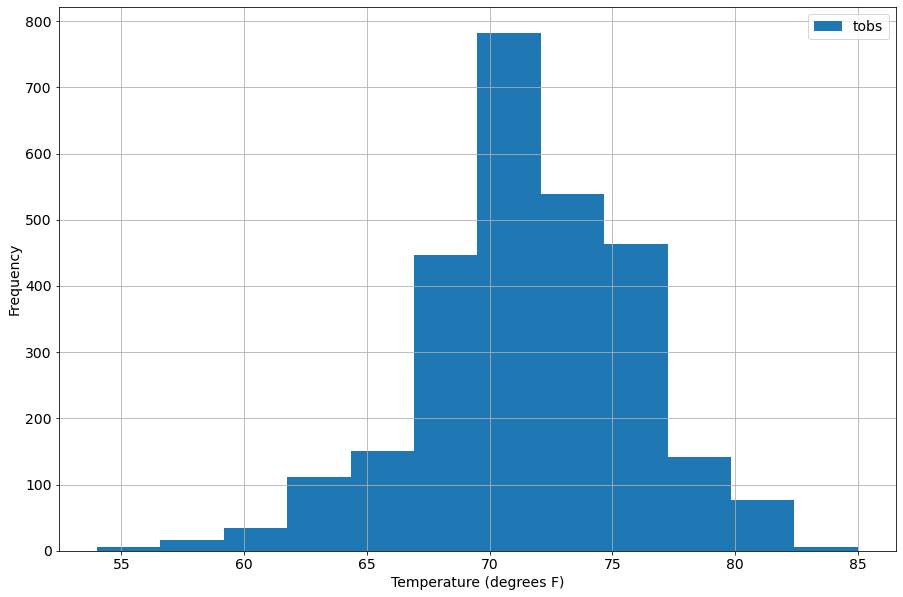

<IPython.core.display.Javascript object>

In [50]:
most_active_temp_station = (
    session.query(Measurement.station, Measurement.tobs)
    .filter(Measurement.station == station_temp_activity[0][0])
    .all()
)
pd.DataFrame(most_active_temp_station).plot(kind="hist", bins=12)
plt.grid()
plt.xlabel("Temperature (degrees F)")
plt.show()

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`